# Fitting Hg Experimental spectra using MATS

In [1]:
## Multi- Spectrum Fitting by Segment

import numpy as np
import pandas as pd
import qgrid
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

sys.path.append(r'C:\Users\ema3\Documents\MATS\MATS')# set location of HAPI.py module
from MATS import *

import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.1.0.9.6
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


## Append to the HITRAN isotope line list to include Hg isotopes

In [2]:

HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = ISO, molec_id = 100, local_iso_id = 1, 
                                                    global_isotope_id = 200, iso_name = '196', 
                                                    abundance = 0.0015, mass = 195.96581, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 2, 
                                                    global_isotope_id = 201, iso_name = '198', 
                                                    abundance = 0.1004, mass =197.96674, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 3, 
                                                    global_isotope_id = 202, iso_name = '199A', 
                                                    abundance = 0.1694, mass =198.96825, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 4, 
                                                    global_isotope_id = 203, iso_name = '199B', 
                                                    abundance = 0.1694, mass =198.96825, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 5, 
                                                    global_isotope_id = 204, iso_name = '200', 
                                                    abundance = 0.2314, mass =199.96825, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 6, 
                                                    global_isotope_id = 205, iso_name = '201a', 
                                                    abundance = 0.1317, mass =200.97028, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 7, 
                                                    global_isotope_id = 206, iso_name = '201b', 
                                                    abundance = 0.1317, mass =200.97028, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 8, 
                                                    global_isotope_id = 207, iso_name = '201c', 
                                                    abundance = 0.1317, mass =200.97028, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 9, 
                                                    global_isotope_id = 208, iso_name = '202', 
                                                    abundance = 0.2974, mass =201.97062, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 10, 
                                                    global_isotope_id = 209, iso_name = '204', 
                                                    abundance = 0.0682, mass =203.97347, mol_name = 'Hg')

This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.


## Load Spectrum

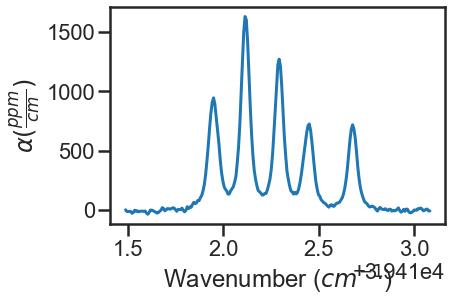

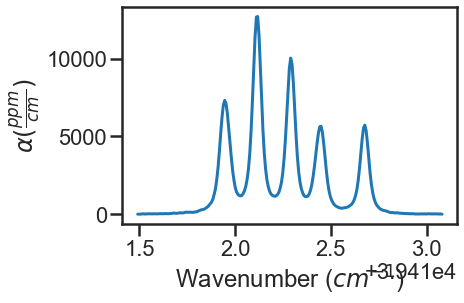

In [30]:
path = r'C:\Users\ema3\Documents\Hg Data'
os.chdir(path)

#Generic Fit Parameters
wave_range = 1.5 #range outside of experimental x-range to simulate
IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-17 #intensities must be above this value for the line to be fit
order_baseline_fit = 0
tau_column = 'Absoprtion Coefficient (ppm/cm)' # Mean tau/us
freq_column = 'Frequency (cm-1)' # Total Frequency /MHz
pressure_column = 'Pressure (Torr)'
temperature_column = 'Temperature'
isotope_linelist = HITRAN_Hg_isolist

spec_1 = Spectrum('c41data', 
                        molefraction = { 100 :5.34126E-09}, isotope_list = isotope_linelist, natural_abundance = True, diluent = 'air', 
                        input_freq = False, frequency_column = freq_column,
                        input_tau = False, tau_column = tau_column,
                        pressure_column = pressure_column, temperature_column = temperature_column, 
                        nominal_temperature = 296)
spec_2 = Spectrum('c287data', 
                        molefraction = { 100 :4.19299E-08}, isotope_list = isotope_linelist, natural_abundance = True, diluent = 'air', 
                        input_freq = False, frequency_column = freq_column,
                        input_tau = False, tau_column = tau_column,
                        pressure_column = pressure_column, temperature_column = temperature_column, 
                        nominal_temperature = 296)


spec_1.plot_wave_alpha()
spec_2.plot_wave_alpha()




## Construct Dataset

In [38]:

#Read in Possible linelists
hapi = r'C:\Users\ema3\Documents\Hg Data'
os.chdir(hapi)
PARAM_LINELIST = pd.read_csv('Hg_Linelist.csv')


#Add all spectrum to a Dataset object
os.chdir(path)
#SPECTRA = Dataset([spec_1, spec_2], 'Mercury Fitting',PARAM_LINELIST ,baseline_order = order_baseline_fit)
SPECTRA = Dataset([spec_2], 'Mercury Fitting',PARAM_LINELIST ,baseline_order = order_baseline_fit)

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()







## Generate Fit Parameter Files

In [54]:
os.chdir(path)
# Set-up for Fitting
#lineprofile = 'NGP' #VP, SDVP, NGP, SDNGP, HTP


  

FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'SDVP', linemixing = False, 
                                  fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                  nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                   aw_constrain = True, as_constrain = True, 
                                   nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True,
                                  additional_columns = ['trans_id'])

FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_sw ={100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}},
                                                    vary_gamma0 = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}},
                                                    vary_delta0 = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_aw = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}},
                                                    vary_as = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_nuVC = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_eta = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_linemixing = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {100: False}, vary_xshift = True, 
                                      vary_etalon_amp= False, vary_etalon_period= False, vary_etalon_phase= False)





,Pressure,Segment Number,Temperature,baseline_a,baseline_b,molefraction_Hg,x_shift,Pressure_err,Pressure_vary,Temperature_err,Temperature_vary,baseline_a_err,baseline_a_vary,baseline_b_err,baseline_b_vary,molefraction_Hg_err,molefraction_Hg_vary,x_shift_err,x_shift_vary
Spectrum Number,,,,,,,,,,,,,,,,,,,
1.0,0.135336,1.0,295.81807,0.0,0.0,4.192990e-08,0.0,0,False,0,False,0,True,0,True,0,False,0,True


Name                    Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_1           0.1353     -inf      inf        0    False     None     None
SD_delta_air_line_0         0     -inf      inf        0    False     None     None
SD_delta_air_line_1         0     -inf      inf        0    False     None     None
SD_delta_air_line_2         0     -inf      inf        0    False     None     None
SD_delta_air_line_3         0     -inf      inf        0    False     None     None
SD_delta_air_line_4         0     -inf      inf        0    False     None     None
SD_delta_air_line_5         0     -inf      inf        0    False     None     None
SD_delta_air_line_6         0     -inf      inf        0    False     None     None
SD_delta_air_line_7         0     -inf      inf        0    False     None     None
SD_delta_air_line_8         0     -inf      inf        0    False     None     None
SD_delta_air_line_9         0     -inf      inf        0    False     None

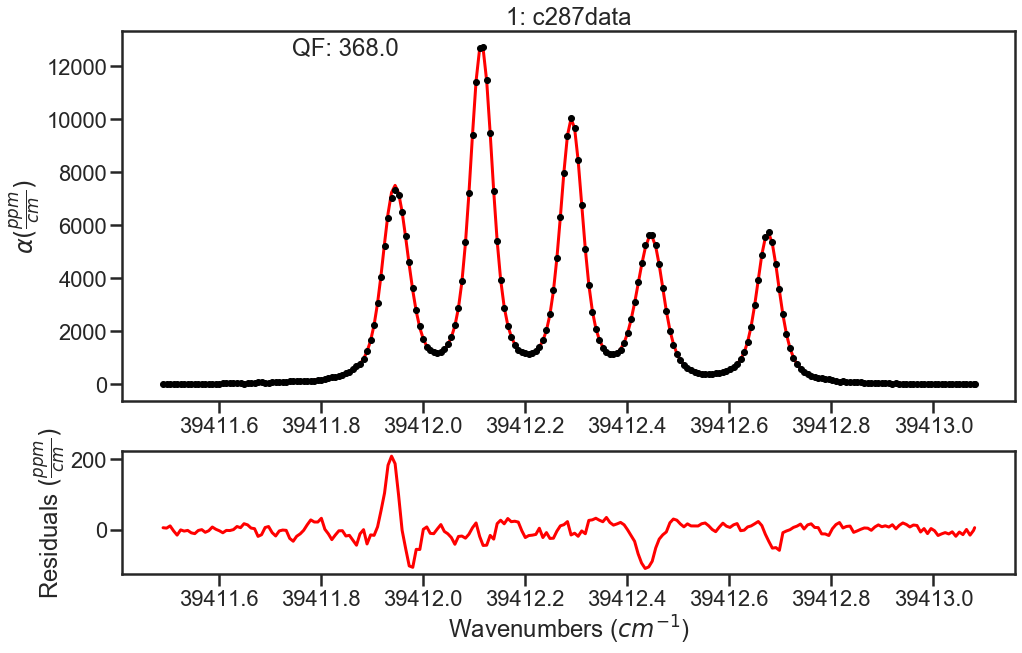

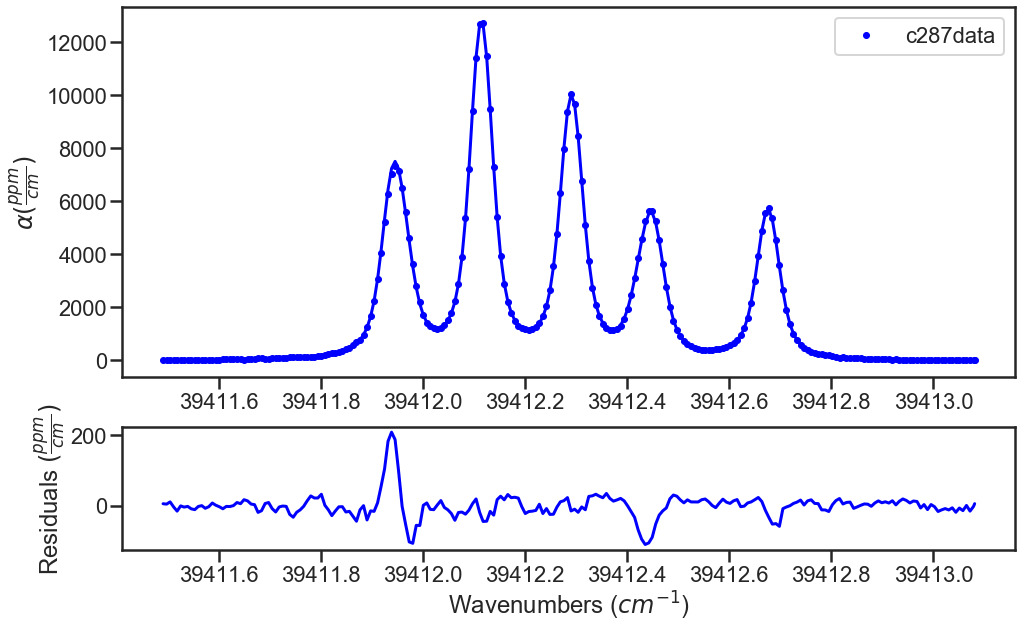

In [62]:
os.chdir(path)   
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity, weight_spectra = False,
                baseline_limit = False, baseline_limit_factor = 10, 
                molefraction_limit = False, molefraction_limit_factor = 1.1, 
                etalon_limit = False, etalon_limit_factor = 2, #phase is constrained to +/- 2pi, 
                x_shift_limit = False, x_shift_limit_magnitude = 0.5, 
                nu_limit = False, nu_limit_magnitude = 0.1, 
                sw_limit = False, sw_limit_factor = 2, 
                gamma0_limit = False, gamma0_limit_factor = 3, n_gamma0_limit= False, n_gamma0_limit_factor = 50, 
                delta0_limit = False, delta0_limit_factor = 2, n_delta0_limit = False, n_delta0_limit_factor = 50, 
                SD_gamma_limit = False, SD_gamma_limit_factor = 2, n_gamma2_limit = False, n_gamma2_limit_factor = 50, 
                SD_delta_limit = False, SD_delta_limit_factor = 50, n_delta2_limit = False, n_delta2_limit_factor = 50, 
                nuVC_limit = False, nuVC_limit_factor = 2, n_nuVC_limit = False, n_nuVC_limit_factor = 50, 
                eta_limit = False, eta_limit_factor = 50, linemixing_limit = False, linemixing_limit_factor = 50)
params = fit_data.generate_params()



for param in params:
    if 'gamma0' in param:
        if params[param].vary == True:
            params[param].set(min = 0.01, max = 0.15)
    if 'delta0' in param:
        if params[param].vary == True:
            params[param].set(min = -0.1, max = 0)
    if 'SD_gamma' in param:
        if param != 'SD_gamma_air_line_4':
            params[param].set(expr = 'SD_gamma_air_line_4')
    if 'gamma0' in param:
        if param != 'gamma0_air_line_4':
            params[param].set(expr = 'gamma0_air_line_4')
        




result = fit_data.fit_data(params, wing_cutoff = 25)
print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)
SPECTRA.plot_model_residuals()


